In [20]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [21]:
teams_df = pd.read_csv('data_merged.csv')

In [22]:
#sb.pairplot(teams_df, hue='playoff', vars=teams_df.columns, corner=True)

<Axes: >

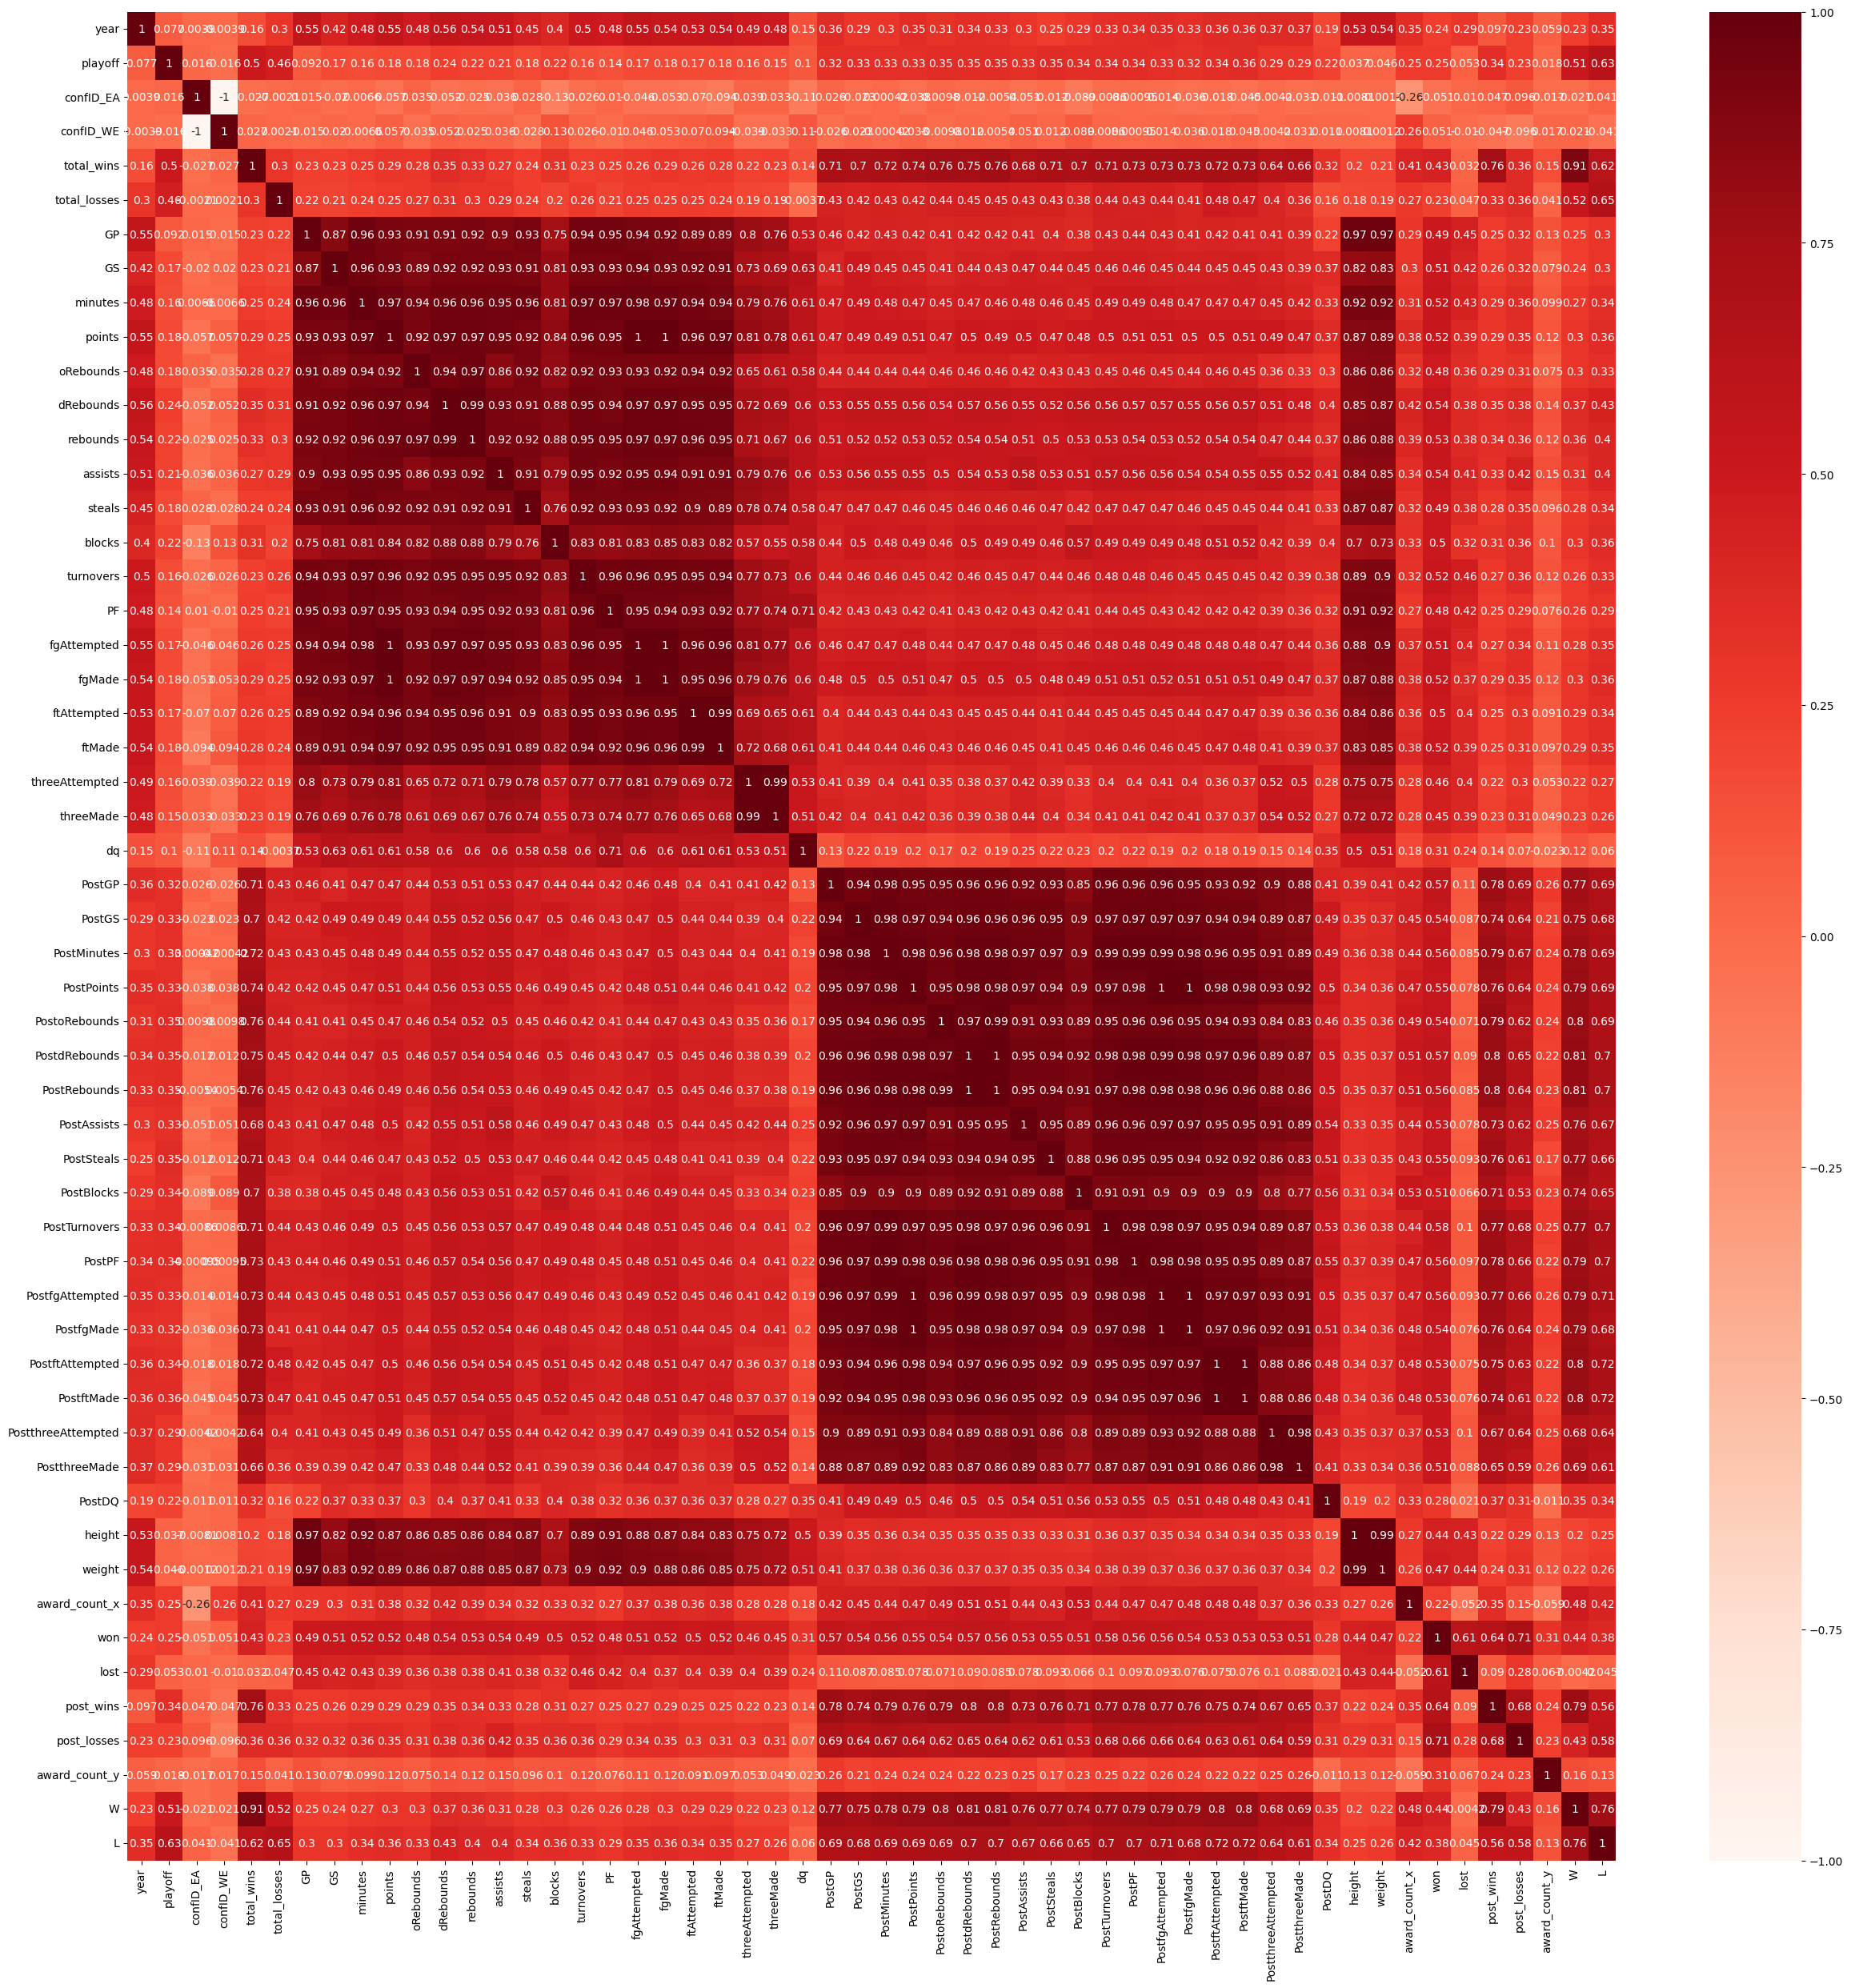

In [23]:
cor = teams_df.drop(columns=['tmID']).corr()
plt.figure(figsize=(30, 30))
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [24]:
teams_df.drop(columns=['ftMade', 'fgMade', 'threeMade', 'PostftMade', 'PostfgMade', 'PostthreeMade'], inplace=True)

## Feature selection with Kbest

In [25]:
X=teams_df.drop(['playoff', 'tmID'], axis=1)
Y=teams_df['playoff']
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(142, 10)


In [26]:
# Get the selected feature indices using get_support()
selected_feature_indices = fs.get_support()

# Get the column names of the selected features
selected_column_names = X.columns[selected_feature_indices]

# Print the selected column names
print(selected_column_names)

Index(['total_wins', 'total_losses', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostSteals', 'PostPF', 'PostftAttempted', 'W', 'L'],
      dtype='object')


In [27]:
selected_column_names=selected_column_names.append( pd.Index(['playoff', 'year', 'tmID', 'confID_EA', 'confID_WE']) )
final_data = teams_df[selected_column_names]
final_data.to_csv('final_data_kbest.csv', index=False)


## Foward Feature selection

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ds=DecisionTreeClassifier()
ffs = SFS(ds, k_features='best', forward=True, n_jobs=-1)
ffs.fit(X, Y)
features = list(ffs.k_feature_names_)
print(features)

['total_wins', 'GS', 'PostBlocks', 'L']


In [29]:
features += ['playoff', 'year', 'tmID', 'confID_EA', 'confID_WE']
final_data = teams_df[features]
#final_data.to_csv('final_data2.csv', index=False)